# Decision Trees

 비선형적인 결정을 Decision Tree를 통해 선형적으로 해석 가능\
 이 때, `multiple`한 선형적 질문을 통해 데이터를 분류

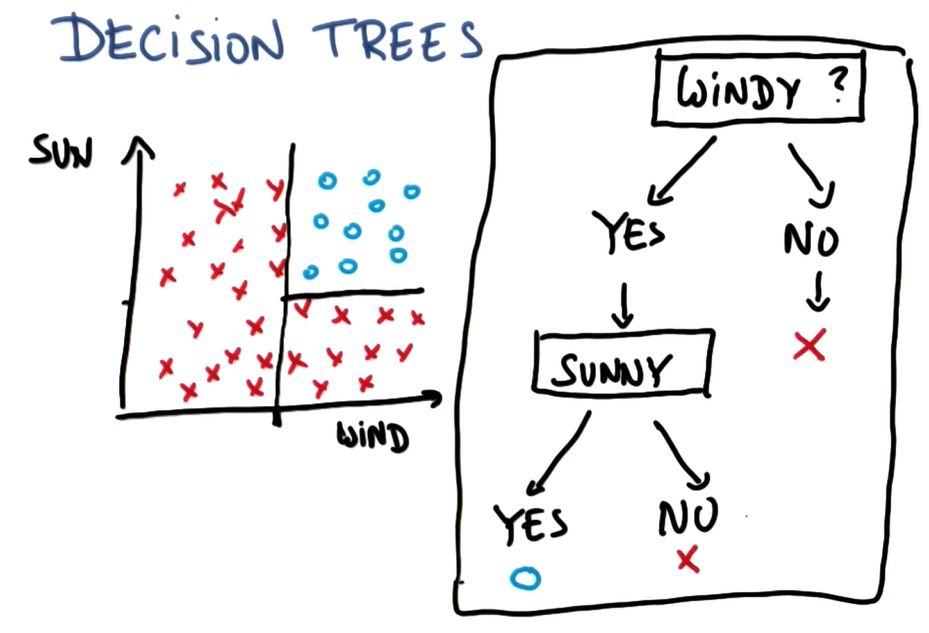

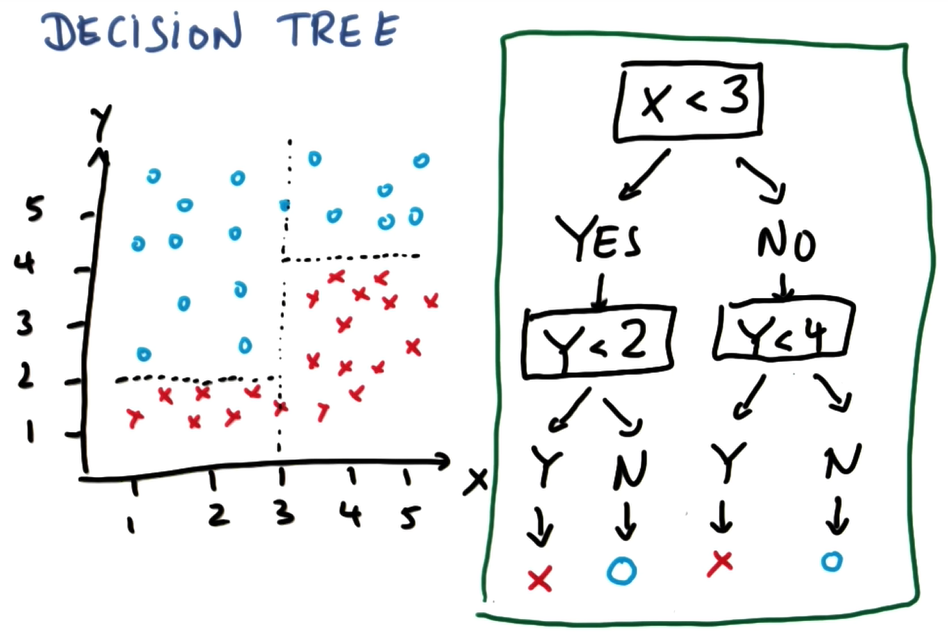

https://scikit-learn.org/stable/modules/tree.html

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [2]:
clf.predict([[2., 2.]])

array([1])

In [3]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

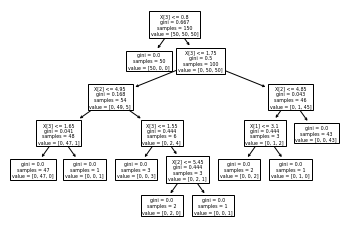

In [5]:
tree.plot_tree(clf) 

## Quiz

studentMain.py

In [ ]:
#!/usr/bin/python

""" lecture and example code for decision tree unit """

import sys
from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from classifyDT import classify

features_train, labels_train, features_test, labels_test = makeTerrainData()



### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train)







#### grader code, do not modify below this line

prettyPicture(clf, features_test, labels_test)
output_image("test.png", "png", open("test.png", "rb").read())


In [ ]:
def classify(features_train, labels_train):
    
    ### your code goes here--should return a trained decision tree classifer
    from sklearn import tree
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(features_train,labels_train)
    
    
    return clf

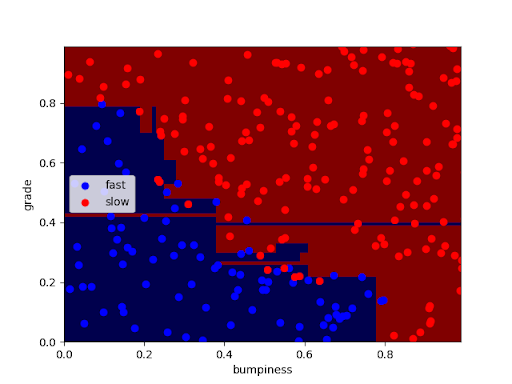

takes as input two arrays: \
an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples \
an array Y of integer values, shape (n_samples,), holding the class labels for the training samples

- predict test sample\
    ```clf.predict(features_test)```

### Accuracy

In [ ]:
import sys
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()



#################################################################################


########################## DECISION TREE #################################



#### your code goes here
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train,labels_train)

# res = clf.predict_proba(features_test)

acc = clf.score(features_test, labels_test)
### be sure to compute the accuracy on the test set


    
def submitAccuracies():
    # acc = 
  return {"acc":round(acc,3)}

Good job! Your output matches our solution.\
Here's your output:\
{'acc': 0.908}

사용 가능한 method를 알 수 있는 페이지\
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Decision Tree Classifier

```python
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

min_samples_split=2\
최소 2개까지의 데이터만 split하겠다는 뜻. 어찌보면 당연 (1개는 더 이상 나눌 수 없기 때문)\
만약 값을 3으로 바꿔주면, 3개의 sample은 1개 2개로 나누지만 2개로 나눠진 sample은 더 이상 나누지 않는다

하지만 이 때문에 overfitting이 일어나기도 한다 => 1개의 data가 outlier일 때, 그 데이터에 대한 조건까지도 적용하기 때문

따라서 min_samples_split을 적당히 높여줌으로써 accuracy를 높일 수 있다

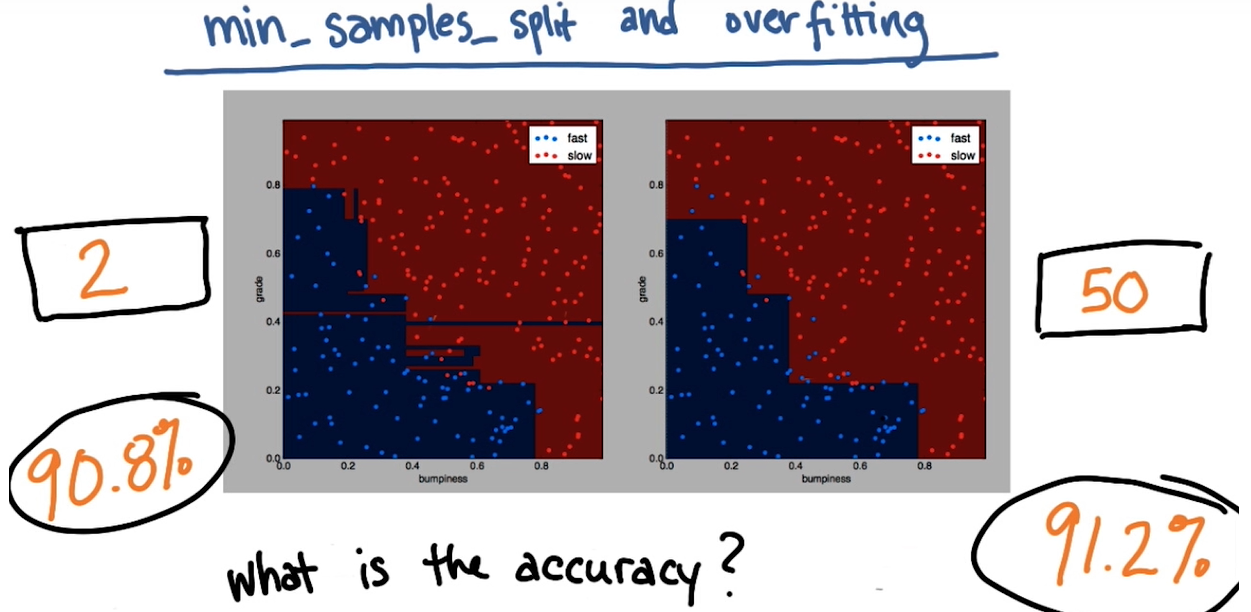

## Entropy
> measure of impurity\
data를 나누는 지점을 결정하는 것을 조절

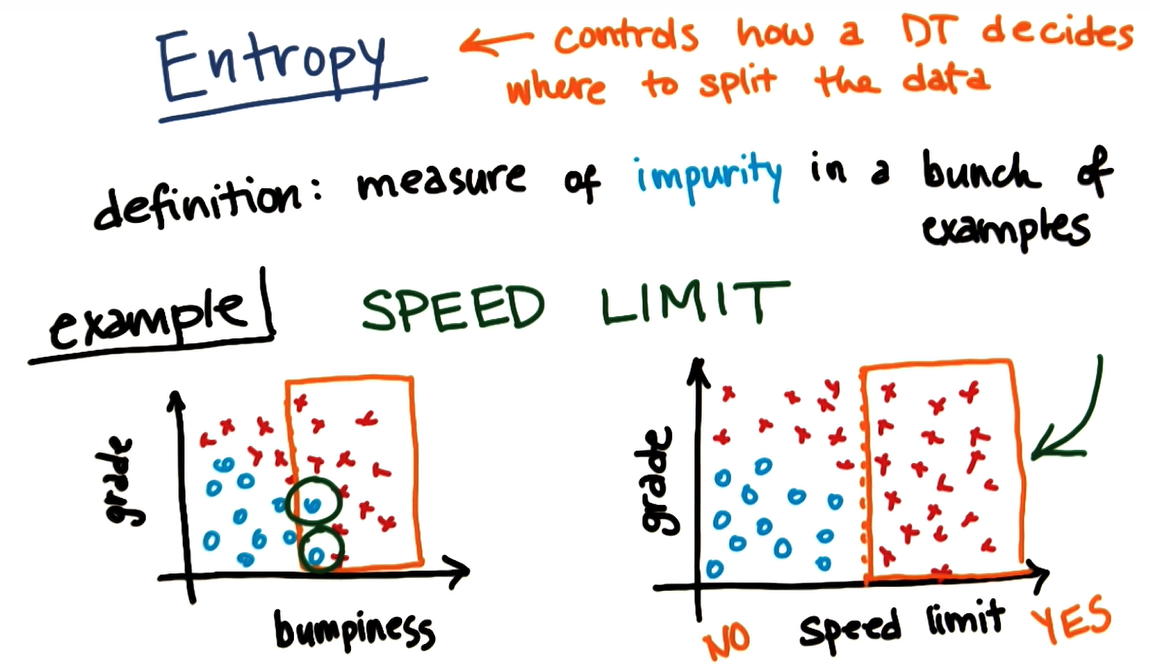

불순물이 적은 지점을 찾음으로써 어느 부분을 나눌지를 결정

### Formula of Entropy

entropy = ∑ -Pi * log_2 (Pi)

Pi : fraction of examples in class i

만약 모든 example이 같은 class라면 entropy = 0

만약 모든 example이 동등하게 분포되어 있다면 entropy = 1

- example은 값 (위의 예시에서는 o냐 x냐)
- class는 값의 범위 (위의 예시에서는 speed limit이 slow냐 fast냐)

ex) Pslow = `fraction of slow in speed limit`\
Pfast = `fraction of fast in speed limit`